## 1) Business Question

**Dataset used**: Diabetes data

**Business Question**: Which features have the highest correlation against the progression of the disease and what is the relationship between those variables and the progression of the disease?

## 2) Data cleansing

### 2A) Load data

In [2]:
# Import necessary packages

# For basic operations
import numpy as np
import pandas as pd

# For loading the dataset
import sklearn.datasets as dsets

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
dataset = dsets.load_diabetes()

In [4]:
# Transform the dataset into a dataframe (Independent variables)
features_df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
features_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
# Rename columns to make it more intuitive
features_df = features_df.rename(columns={"bp": "blood_pressure",
                                          "s1":"serum_cholesterol",
                                          "s2":"low_den_lipoproteins", 
                                          "s3":"high_den_lipoproteins",
                                          "s4":"cholesterol",
                                          "s5":"triglycerides",
                                          "s6":"blood_sugar_level"
                                         })

features_df.head()

,age,sex,bmi,blood_pressure,serum_cholesterol,low_den_lipoproteins,high_den_lipoproteins,cholesterol,triglycerides,blood_sugar_level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
# Transform the dataset into a dataframe (Dependent variable)
disease_progression_df = pd.DataFrame(data=dataset['target'],columns=['disease_progression'])
disease_progression_df.head()

,disease_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [7]:
# Combine independent variable dataframe (features_df) with the target variable (disease_progression_df)
diabetes_df = pd.concat([features_df, disease_progression_df], axis=1)
diabetes_df.head()

,age,sex,bmi,blood_pressure,serum_cholesterol,low_den_lipoproteins,high_den_lipoproteins,cholesterol,triglycerides,blood_sugar_level,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
# Count the number of rows of the dataset
np.shape(diabetes_df)[0]

442

#### Data nuggets (diabetes_df)
- 442 rows
- 11 features as follows:
    - age
    - sex
    - bmi: Body Mass Index
    - blood_pressure: Average blood pressure
    - serum_cholesterol: Total serum cholesterol
    - low_den_lipoproteins: Low-density lipoproteins
    - high_den_lipoproteins: High-density lipoproteins
    - cholesterol: Total cholesterol/HDL
    - triglycerides: Possibly log of serum triglycerides level
    - blood_sugar_level: Blood sugar level
    - disease_progression: Disease progression one year after baseline

### 2B) Detect null values

In [10]:
# Create a function to calculate the percentage of null values in the dataframe
for i, col in diabetes_df.items():
    count_null = col.isnull()
    percentage_null = count_null.sum() * 100.0 / np.shape(diabetes_df)[0]
    print("Percentage of null values in column %s = %.2f%%" % (i, percentage_null))
    #print(percentage_null)

Percentage of null values in column age = 0.00%
Percentage of null values in column sex = 0.00%
Percentage of null values in column bmi = 0.00%
Percentage of null values in column blood_pressure = 0.00%
Percentage of null values in column serum_cholesterol = 0.00%
Percentage of null values in column low_den_lipoproteins = 0.00%
Percentage of null values in column high_den_lipoproteins = 0.00%
Percentage of null values in column cholesterol = 0.00%
Percentage of null values in column triglycerides = 0.00%
Percentage of null values in column blood_sugar_level = 0.00%
Percentage of null values in column disease_progression = 0.00%


From the function above, we concluded that there are **no null values in this dataframe**. Therefore, we will not do any further treatment in this section and directly continue to the next step: Remove outliers.

### 2C) Remove outliers

In order to remove outliers, we used the IQR approach.
- Firstly, we visualised the data using boxplot to see if there are columns with outliers.
- Secondly, we created a function to calculate the interquartile range (IQR) of each feature.
- Lastly, we removed the data that is below the lower fence or above the upper fence.

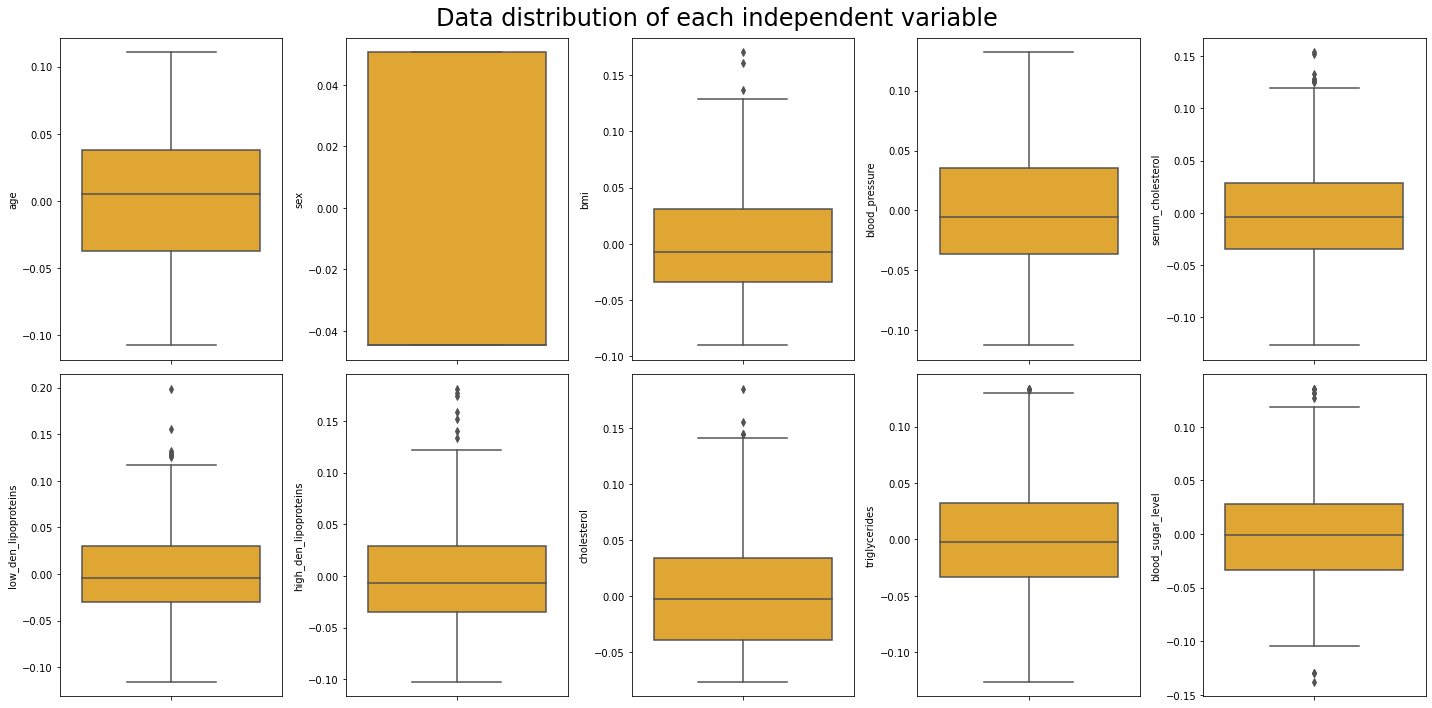

In [9]:
# 1A. Visualise the outliers (Independent variables)
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
fig.suptitle('Data distribution of each independent variable', fontsize=24)
index = 0
ax = ax.flatten()

for i, col in features_df.items():
    sns.boxplot(y=i, data=features_df, ax=ax[index], color = "#FCAF17")
    index += 1
plt.tight_layout()

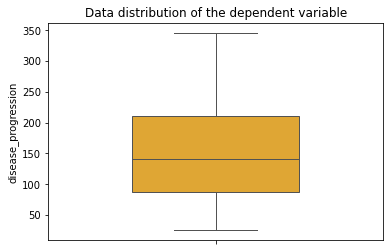

In [10]:
# 1B. Visualise the outliers (Dependent variables)
ax = sns.boxplot(y=diabetes_df['disease_progression'], data=diabetes_df, linewidth=1, width=0.5, color="#FCAF17").set_title('Data distribution of the dependent variable')
plt.show()

From the box plots above, we learned that **bmi, serum_cholesterol, low_den_lipoproteins, high_den_lipoproteins, chrolesterol, triglycerides, and blood_sugar_level** have some outliers. To make sure that these are the only variables that have outliers, we will calculate the percentage of outliers using IQR approach using the function below.

In [11]:
# 2. Understanding how many outliers we have in each column
for i, col in diabetes_df.items():
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    count_outliers = col[(col <= lower_fence) | (col >= upper_fence)]
    percentage_outliers = np.shape(count_outliers)[0] * 100.0 / np.shape(features_df)[0]
    print("Percentage of outliers in column %s = %.2f%%" % (i, percentage_outliers))

Percentage of outliers in column age = 0.00%
Percentage of outliers in column sex = 0.00%
Percentage of outliers in column bmi = 0.68%
Percentage of outliers in column blood_pressure = 0.00%
Percentage of outliers in column serum_cholesterol = 1.81%
Percentage of outliers in column low_den_lipoproteins = 1.58%
Percentage of outliers in column high_den_lipoproteins = 1.58%
Percentage of outliers in column cholesterol = 0.90%
Percentage of outliers in column triglycerides = 0.90%
Percentage of outliers in column blood_sugar_level = 2.04%
Percentage of outliers in column disease_progression = 0.00%


In [12]:
## 3. Remove outliers using IQR approach
for i, col in diabetes_df.items():
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR
    diabetes_df = diabetes_df.drop(diabetes_df[(diabetes_df[i] <= lower_fence) | (diabetes_df[i] >= upper_fence)].index)

In [13]:
# 4. Count the number of rows after removing outlets
np.shape(diabetes_df)[0]

409

Before removing outliers, the dataframe has **442** rows. After removing outliers, it only has **409** rows.

### 2D) Normalise data

After removing outliers, we are going to check the data distribution of each variable. If there is any skewed distribution, we are going to apply a normalisation.

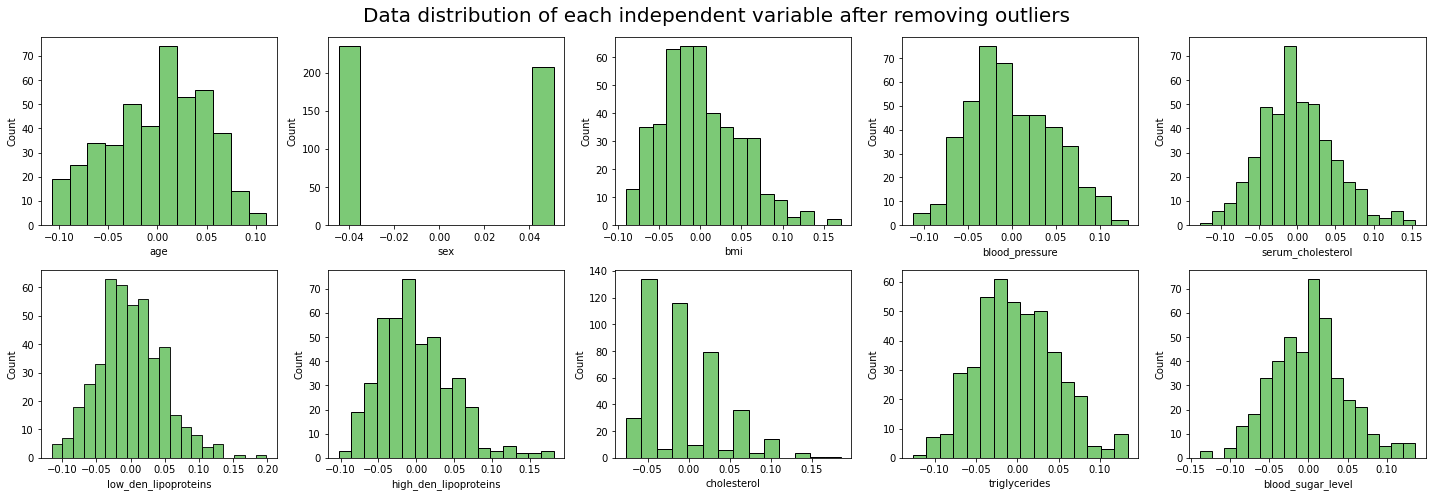

In [14]:
# 1A. Show data distribution using histogram (Independent variables)
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 7))
fig.suptitle('Data distribution of each independent variable after removing outliers', fontsize=20)
index = 0
ax = ax.flatten()

for i, col in features_df.items():
    sns.histplot(col, ax=ax[index], color="#50B848")
    index += 1
plt.tight_layout()

Text(0.5, 1.0, 'Data distribution of the dependent variable after removing outliers')

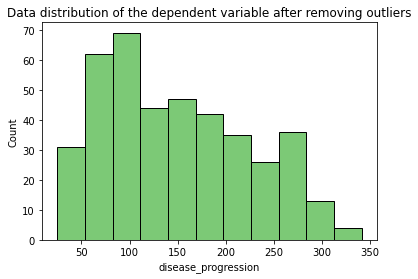

In [15]:
# 1B. Show data distribution using histogram (Dependent variables)
sns.histplot(data=diabetes_df, x=diabetes_df['disease_progression'], color = '#50B848').set_title('Data distribution of the dependent variable after removing outliers')

In [16]:
# 2. Check skewness value
skewness_value = diabetes_df.skew(axis = 0)
print("SKEWNESS VALUE")
print(skewness_value)

SKEWNESS VALUE
age                     -0.249141
sex                      0.113063
bmi                      0.510295
blood_pressure           0.312317
serum_cholesterol        0.124389
low_den_lipoproteins     0.089594
high_den_lipoproteins    0.421198
cholesterol              0.581119
triglycerides            0.240519
blood_sugar_level        0.157333
disease_progression      0.467506
dtype: float64


**Interpreting skewness value**

1. Highly skewed distribution:
The skewness value is less than −1 or greater than +1.

2. Moderately skewed distribution:
The skewness value is between −1 and −0.5 or between +0.5 and +1.

3. Approximately symmetric distribution:
If the skewness value is between −0.5 and +0.5.

From the results, we learned that **bmi** and **cholesterol** have moderately skewed distribution. Therefore, in the next steps, we will normalise these two variables.

Since we have negative values in the skewed variables (bmi and cholesterol), we will scale the data before applying a normalisation function. In this case, we use an approach where we add a constant to the original value so that **min(i + a) = 1**, where i is the original value and a is the constant. After we scale the original value, we will apply a log transformation to normalise the data.

In [17]:
# Copy the original dataframe
diabetes_df_norm = diabetes_df.copy()

In [18]:
# 3. Create a function to scale the original data
def normalised(col):
    min_value = col.min(axis=0)
    scaled = col + (min_value * (-1)) + 1
    return scaled

In [19]:
# 4. Replace the original data with the scaled data
diabetes_df_norm['cholesterol'] = normalised(diabetes_df_norm['cholesterol'])
diabetes_df_norm['bmi'] = normalised(diabetes_df_norm['bmi'])
diabetes_df_norm

,age,sex,bmi,blood_pressure,serum_cholesterol,low_den_lipoproteins,high_den_lipoproteins,cholesterol,triglycerides,blood_sugar_level,disease_progression
0,0.038076,0.050680,1.151972,0.021872,-0.044223,-0.034821,-0.043401,1.073802,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,1.038801,-0.026328,-0.008449,-0.019163,0.074412,1.036901,-0.068330,-0.092204,75.0
2,0.085299,0.050680,1.134727,-0.005671,-0.045599,-0.034194,-0.032356,1.073802,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,1.078680,-0.036656,0.012191,0.024991,-0.036038,1.110703,0.022692,-0.009362,206.0
4,0.005383,-0.044642,1.053891,0.021872,0.003935,0.015596,0.008142,1.073802,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,1.016167,-0.050428,-0.024960,-0.047034,0.092820,1.000000,-0.061177,-0.046641,48.0
437,0.041708,0.050680,1.109937,0.059744,-0.005697,-0.002566,-0.028674,1.073802,0.031193,0.007207,178.0
438,-0.005515,0.050680,1.074369,-0.067642,0.049341,0.079165,-0.028674,1.110703,-0.018118,0.044485,104.0
439,0.041708,0.050680,1.074369,0.017282,-0.037344,-0.013840,-0.024993,1.065315,-0.046879,0.015491,132.0


In [20]:
# 5. Define a log transformation function
def normalised_log(col):
    log_value = np.log(col)
    return log_value

In [21]:
# 6. Replace the data with the log transformed data
diabetes_df_norm['cholesterol'] = normalised_log(diabetes_df_norm['cholesterol'])
diabetes_df_norm['bmi'] = normalised_log(diabetes_df_norm['bmi'])
diabetes_df_norm

,age,sex,bmi,blood_pressure,serum_cholesterol,low_den_lipoproteins,high_den_lipoproteins,cholesterol,triglycerides,blood_sugar_level,disease_progression
0,0.038076,0.050680,0.141475,0.021872,-0.044223,-0.034821,-0.043401,0.071206,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,0.038067,-0.026328,-0.008449,-0.019163,0.074412,0.036237,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.126392,-0.005671,-0.045599,-0.034194,-0.032356,0.071206,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,0.075738,-0.036656,0.012191,0.024991,-0.036038,0.104993,0.022692,-0.009362,206.0
4,0.005383,-0.044642,0.052489,0.021872,0.003935,0.015596,0.008142,0.071206,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,0.016038,-0.050428,-0.024960,-0.047034,0.092820,0.000000,-0.061177,-0.046641,48.0
437,0.041708,0.050680,0.104303,0.059744,-0.005697,-0.002566,-0.028674,0.071206,0.031193,0.007207,178.0
438,-0.005515,0.050680,0.071734,-0.067642,0.049341,0.079165,-0.028674,0.104993,-0.018118,0.044485,104.0
439,0.041708,0.050680,0.071734,0.017282,-0.037344,-0.013840,-0.024993,0.063271,-0.046879,0.015491,132.0


In [22]:
# 7. Validate the skewness level after applying a normalisation
skewness_value = diabetes_df_norm.skew()
print("SKEWNESS VALUE")
print(skewness_value)

SKEWNESS VALUE
age                     -0.249141
sex                      0.113063
bmi                      0.415881
blood_pressure           0.312317
serum_cholesterol        0.124389
low_den_lipoproteins     0.089594
high_den_lipoproteins    0.421198
cholesterol              0.485165
triglycerides            0.240519
blood_sugar_level        0.157333
disease_progression      0.467506
dtype: float64


Results of normalisation using log transformation:
- **bmi** skewness reduced from **0.510295** to **0.415881** after normalisation. It is now normally distributed.
- **cholesterol** reduced from **0.581119** to **0.485165** after normalisation. It is now normally distributed.

## 3) Analysis

In [23]:
# Load the clean dataset
clean_diabetes_df = diabetes_df_norm.copy()

In [24]:
# Use the describe function to give a clear picture of the data
clean_diabetes_df.describe()

,age,sex,bmi,blood_pressure,serum_cholesterol,low_den_lipoproteins,high_den_lipoproteins,cholesterol,triglycerides,blood_sugar_level,disease_progression
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,-0.000017,0.000339,0.083935,-0.000286,-0.004509,-0.002759,-0.001260,0.070101,-0.003247,-0.002080,149.349633
std,0.048304,0.047644,0.041404,0.046649,0.043652,0.043887,0.043261,0.039802,0.045339,0.044229,75.406074
min,-0.107226,-0.044642,0.000000,-0.112400,-0.126781,-0.115613,-0.102307,0.000000,-0.126097,-0.104630,25.000000
25%,-0.034575,-0.044642,0.054532,-0.033214,-0.035968,-0.030437,-0.032356,0.036237,-0.034524,-0.034215,85.000000
50%,0.005383,-0.044642,0.078731,-0.005671,-0.005697,-0.004445,-0.006584,0.071206,-0.005145,-0.001078,138.000000
75%,0.038076,0.050680,0.112042,0.032201,0.023198,0.024991,0.026550,0.104993,0.028017,0.027917,202.000000
max,0.110727,0.050680,0.197863,0.132044,0.109883,0.117056,0.122273,0.196977,0.130081,0.119043,341.000000


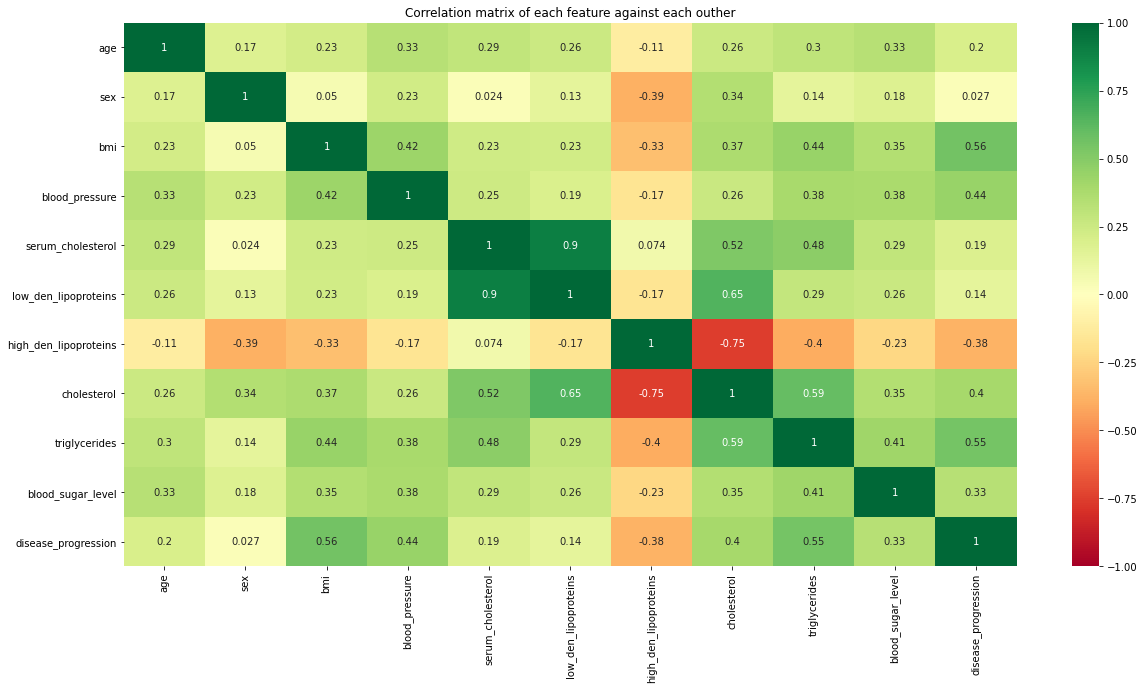

In [25]:
# Check the correlation of variable against the target variable (disease_progression)
plt.figure(figsize=(20, 10))
sns.heatmap(clean_diabetes_df.corr(), vmin=-1, vmax= 1, cmap="RdYlGn", annot=True).set_title('Correlation matrix of each feature against each outher')
plt.show()

In [26]:
# Create a separate dataframe for correlation interpretation
corr_df = clean_diabetes_df.corr()
corr_df = corr_df['disease_progression'].reset_index().rename(columns={"index":"feature","disease_progression":"correlation_to_target_variable"})
corr_df = corr_df[corr_df['feature']!="disease_progression"] # Drop disease_progression row because it is the target variable

# Create a function for interpretation
interpretation_list=[]
for i in corr_df['correlation_to_target_variable']:
    if i >= 0.8 and i <= 1.0:
        interpretation_list.append('Very strong positive correlation')
    elif i >= 0.6 and i < 0.8:
        interpretation_list.append('Strong positive correlation')
    elif i >= 0.4 and i < 0.6:
        interpretation_list.append('Medium positive correlation')
    elif i >= 0.2 and i < 0.4:
        interpretation_list.append('Weak positive correlation')
    elif i >= 0.0 and i < 0.2:
        interpretation_list.append('Very weak positive correlation')
    elif i >= -0.2 and i < 0.0:
        interpretation_list.append('Very weak negative correlation')
    elif i >= -0.4 and i < -0.2:
        interpretation_list.append('Weak negative correlation')
    elif i >= -0.6 and i < -0.4:
        interpretation_list.append('Medium negative correlation')
    elif i >= -0.8 and i < -0.6:
        interpretation_list.append('Strong negative correlation')
    else:
        interpretation_list.append('Very strong negative correlation')
        
# Add a new column name "interpretation"        
corr_df['interpretation'] = interpretation_list

# Sort table by correlation value
corr_df = corr_df.sort_values(by=['correlation_to_target_variable'], ascending=False).reset_index(drop=True)
corr_df

,feature,correlation_to_target_variable,interpretation
0,bmi,0.561930,Medium positive correlation
1,triglycerides,0.553275,Medium positive correlation
2,blood_pressure,0.442058,Medium positive correlation
3,cholesterol,0.397820,Weak positive correlation
4,blood_sugar_level,0.334784,Weak positive correlation
5,age,0.202772,Weak positive correlation
6,serum_cholesterol,0.186546,Very weak positive correlation
7,low_den_lipoproteins,0.137709,Very weak positive correlation
8,sex,0.026632,Very weak positive correlation
9,high_den_lipoproteins,-0.375608,Weak negative correlation


From the graph above, **the highest correlating independent variables against the dependent variable** are: 
1. **BMI (Body Mass Index)** = 0.56
2. **Triglycerides (Triglycerides are the main constituents of natural fats and oils)** = 0.55
3. **Blood Pressure** = 0.44

## 4) Analysis Summary

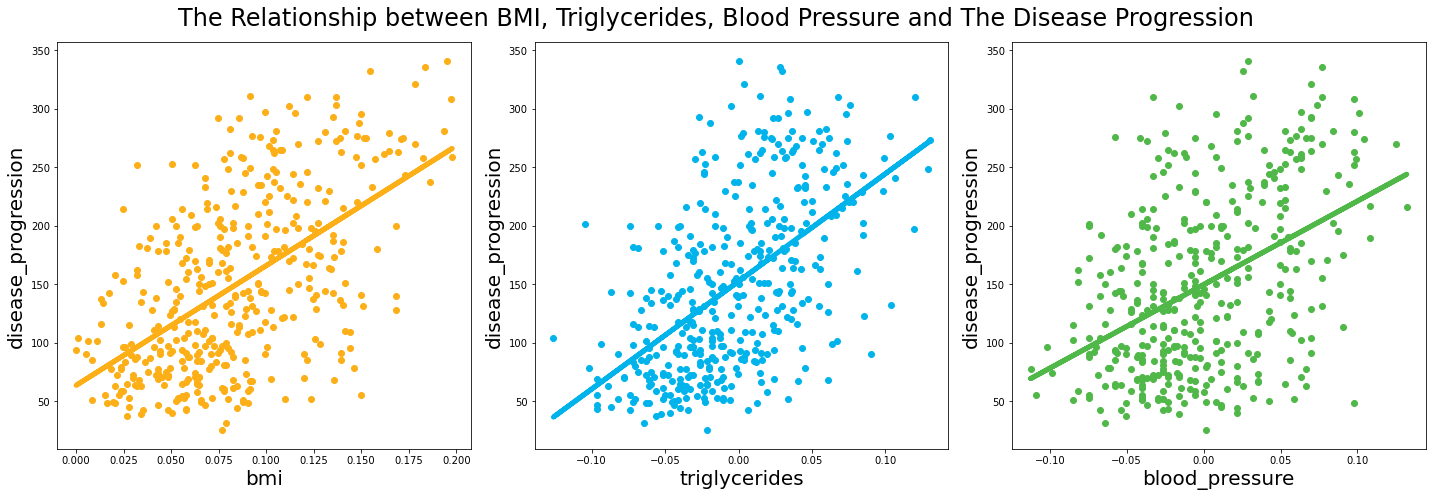

In [27]:
# Create a separate dataframe for visualisation
scatter_viz_df = clean_diabetes_df[['bmi','triglycerides','blood_pressure']]
scatter_viz_df.head()

# Show the scatter plot for the highest three correlating independent variables against the dependent variable 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
fig.suptitle('The Relationship between BMI, Triglycerides, Blood Pressure and The Disease Progression', fontsize=24)

index = 0
x_axis = scatter_viz_df.keys().to_list()
y_axis = clean_diabetes_df.columns[10]
chart_color = ["#FCAF17","#00B4EB","#50B848"]

for i, col in scatter_viz_df.items():
    plt.subplot(1,3,(index + 1))
    plt.scatter(x=col, y=clean_diabetes_df['disease_progression'], c=chart_color[index])
    z = np.polyfit(x=col, y=clean_diabetes_df['disease_progression'], deg=1)
    p = np.poly1d(z)
    plt.plot(col, p(col), color=chart_color[index], linewidth=5)
    plt.xlabel(x_axis[index], fontsize=20)
    plt.ylabel(y_axis, fontsize=20)
    index += 1
plt.tight_layout()
plt.show()

A sample of 442 diabetes patients was measured on 10 standard body variables, indicated below, to highlight the relationship between these variables and the progression of the disease among the patients in a one-year time period.
-       Age
-       Sex
-       Body Mass Index
-       Average blood pressure
-       Total serum cholesterol
-       Low-density lipoproteins
-       High-density lipoproteins
-       Total cholesterol/HDL
-       Triglycerides level
-       Blood sugar level

The methodology followed to achieve this goal consisted of two main steps:
  - First step: Preparing the data by conducting a series of data cleansing processes, to remove outliers, null values, and normalise the data skewness.
  - Second step: Analysing the data through obtaining the statistical correlation coefficient which indicates the relationship between each variable and the disease progression.

The obtained results show a positive relationship between almost all variables and the disease progression in the specified period. However, the strength of the relationship varies greatly. The highest correlating features against the disease progression are **body mass index (0.56), triglycerides (0.51) and blood pressure (0.41).** All of these features have **medium positive correlations** as seen in the scatter plots above. Meanwhile, **low-density lipoproteins, and serum cholesterol levels, and sex** do not have a significant correlation against the diabetes progression.